<a href="https://colab.research.google.com/github/AnithaKandugula/NLP/blob/main/2303A510F2(Lab_Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
import pandas as pd
df=pd.read_csv('/content/tweets[1].csv')
print(df)

          id  keyword                 location  \
0          0   ablaze                      NaN   
1          1   ablaze                      NaN   
2          2   ablaze            New York City   
3          3   ablaze           Morgantown, WV   
4          4   ablaze                      NaN   
...      ...      ...                      ...   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   
11369  11369  wrecked                      NaN   

                                                    text  target  
0      Communal violence in Bhainsa, Telangana. "Ston...       1  
1      Telangana: Section 144 has been imposed in Bha...       1  
2      Arsonist sets cars ablaze at dealership https:...       1  
3      Arsonist sets cars ablaze at dealership https:...       1  
4      "Lord Jesus, your love brings freedom and pard...       0

In [9]:
import spacy
nlp = spacy.load("en_core_web_sm")
def preprocess_tokens(text):
    doc = nlp(str(text))
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return tokens
df["tokens"] = df["text"].apply(preprocess_tokens)
print(df[["text", "tokens"]].head())


                                                text  \
0  Communal violence in Bhainsa, Telangana. "Ston...   
1  Telangana: Section 144 has been imposed in Bha...   
2  Arsonist sets cars ablaze at dealership https:...   
3  Arsonist sets cars ablaze at dealership https:...   
4  "Lord Jesus, your love brings freedom and pard...   

                                              tokens  
0  [communal, violence, bhainsa, telangana, stone...  
1  [telangana, section, impose, bhainsa, january,...  
2           [arsonist, set, car, ablaze, dealership]  
3           [arsonist, set, car, ablaze, dealership]  
4  [lord, jesus, love, bring, freedom, pardon, fi...  


In [19]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

nlp = spacy.load("en_core_web_sm")

df = pd.read_csv("/content/tweets[1].csv")

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess_text)

tfidf = TfidfVectorizer(max_features=5000)

X_tfidf = tfidf.fit_transform(df["clean_text"])

feature_names = tfidf.get_feature_names_out()

print("Shape of TF-IDF matrix:", X_tfidf.shape)

tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

print(tfidf_df.iloc[:10, :15])

Shape of TF-IDF matrix: (11370, 5000)
    ab  abandon  abbott  abby  ability    ablaze  able  aboard  aboriginal  \
0  0.0      0.0     0.0   0.0      0.0  0.275584   0.0     0.0         0.0   
1  0.0      0.0     0.0   0.0      0.0  0.000000   0.0     0.0         0.0   
2  0.0      0.0     0.0   0.0      0.0  0.535194   0.0     0.0         0.0   
3  0.0      0.0     0.0   0.0      0.0  0.535194   0.0     0.0         0.0   
4  0.0      0.0     0.0   0.0      0.0  0.306657   0.0     0.0         0.0   
5  0.0      0.0     0.0   0.0      0.0  0.349626   0.0     0.0         0.0   
6  0.0      0.0     0.0   0.0      0.0  0.312761   0.0     0.0         0.0   
7  0.0      0.0     0.0   0.0      0.0  0.306099   0.0     0.0         0.0   
8  0.0      0.0     0.0   0.0      0.0  0.302755   0.0     0.0         0.0   
9  0.0      0.0     0.0   0.0      0.0  0.292002   0.0     0.0         0.0   

   abortion  absolute  absolutely  abstain  abt  abu  
0       0.0       0.0         0.0      0.0  0.0 

Accuracy: 0.862796833773087
Precision: 0.8718045678033747
Recall: 0.862796833773087
F1-score: 0.8264564334819747


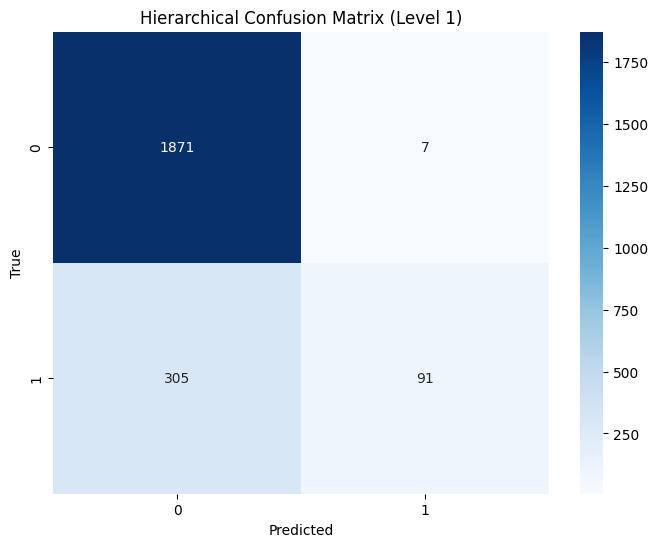

In [6]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

df = pd.read_csv("/content/tweets[1].csv")
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(str(text))
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


cm = confusion_matrix(y_test, y_pred)
labels = sorted(y.unique())

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Hierarchical Confusion Matrix (Level 1)")
plt.show()
